
# 나이브 베이즈를 이용한 스팸 분류



# PROBLEM STATEMENT

- 5,574개의 이메일 메시지가 있으며, 스팸인지 아닌지의 정보를 가지고 있다.
- 컬럼 : text, spam
- spam 컬럼의 값이 1이면 스팸이고, 0이면 스팸이 아닙니다.
- 스팸인지 아닌지 분류하는 인공지능을 만들자 - 수퍼바이즈드 러닝의 분류 문제!


# STEP #0: LIBRARIES IMPORT


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os

os.chdir('/content/drive/MyDrive/Colab Notebooks/빅데이터 분석/week08')

# STEP #1: IMPORT DATASET

emails.csv 읽기

In [4]:
spam_df =  pd.read_csv('emails.csv')

- 슈퍼바이즈드 러닝

In [21]:
spam_df # 슈퍼바이즈드 러닝

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [6]:
spam_df['text'][0]

"Subject: naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market is full of suqgestions and the information isoverwhelminq ; but a good  catchy logo , stylish statlonery and outstanding website  will make the task much easier .  we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader : it isguite ciear that  without good products , effective business organization and practicable aim it  will be hotat nowadays market ; but we do promise that your marketing efforts  will become much more effective . here is the list of clear  benefits : creativeness : hand - made , original logos , specially done  to reflect your distinctive company image . convenience : logo and stationery  are provided in all formats ; easy - to - use content management system letsyou  change your website content and even its structure . promptness : you  will see logo drafts within three business days . affordability : your  ma

In [7]:
spam_df.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [13]:
spam_df.isna().sum()

text    0
spam    0
dtype: int64

# STEP #2: VISUALIZE DATASET

## 스팸은 몇개이고, 아닌것은 몇개인지 확인.

In [20]:
spam_df.loc[spam_df['spam'] == 1 , ].count()  # spam

text    1368
spam    1368
dtype: int64

In [22]:
spam_df.loc[spam_df['spam'] == 0 , ].count() 

text    4360
spam    4360
dtype: int64

In [30]:
spam_df['spam'].value_counts()

0    4360
1    1368
Name: spam, dtype: int64

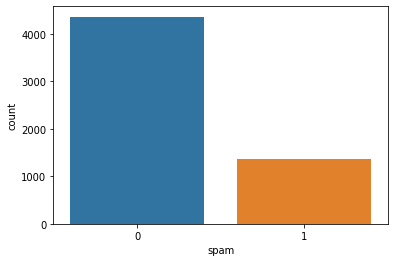

In [34]:
sns.countplot(data=spam_df, x ='spam')
plt.show()

## 이메일의 길이가 스팸과 관련이 있는지 확인한다.
## 이메일의 문자 길이를 구해서, length 라는 컬럼을 만든다. 

In [35]:
spam_df['length'] = spam_df['text'].apply(len)

## 글자 길이를 히스토그램으로 나타낸다.

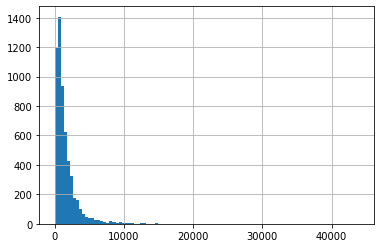

In [38]:
spam_df['length'].hist(bins=100)
plt.show()

## 가장 긴 이메일을 찾아서 스팸인지 아닌지 확인하고, 이메일 내용을 확인한다.

In [41]:
spam_df.loc[spam_df['length'] == spam_df['length'].max(), ]

,text,spam,length
2650,Subject: from the enron india newsdesk - april...,0,43952


In [42]:
spam_df.loc[spam_df['length'] == spam_df['length'].max(), ]['text']

2650    Subject: from the enron india newsdesk - april...
Name: text, dtype: object

In [44]:
spam_df.loc[spam_df['length'] == spam_df['length'].max(),'text' ][2650]

'Subject: from the enron india newsdesk - april 27 th newsclips  fyi news articles from indian press .  - - - - - - - - - - - - - - - - - - - - - - forwarded by sandeep kohli / enron _ development on 04 / 27 / 2001 08 : 24 am - - - - - - - - - - - - - - - - - - - - - - - - - - -  nikita varma  04 / 27 / 2001 07 : 51 am  to : nikita varma / enron _ development @ enron _ development  cc : ( bcc : sandeep kohli / enron _ development )  subject : from the enron india newsdesk - april 27 th newsclips  friday apr 27 2001 , http : / / www . economictimes . com / today / cmo 3 . htm  dpc board empowers md to cancel mseb contract  friday apr 27 2001 , http : / / www . economictimes . com / today / 27 compl 1 . htm  mseb pays rs 134 cr under \' protest \' to dpc  friday , april 27 , 001 , http : / / www . businessstandard . com / today / economy 4 . asp ? menu = 3  enron india md authorised to terminate ppa  friday , april 27 , 2001 , http : / / www . financialexpress . com / fe 20010427 / topl 

## 0은 스팸 X, 1은 스팸.
## 파이차트를 통해, 스팸과 스팸이 아닌것이 몇 퍼센트인지 소수점 1자리 까지만 보인다.

In [46]:
spam_df['spam'].value_counts()

0    4360
1    1368
Name: spam, dtype: int64

In [47]:
df_count = spam_df['spam'].value_counts()

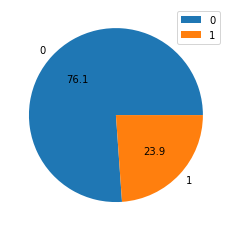

In [51]:
plt.pie(df_count, labels = ['0','1'] , autopct='%.1f')  #autopct 퍼센트
plt.legend()
plt.show()

## 스팸이 아닌것은 ham 변수로, 스팸인것은 spam 변수로 저장한다.

In [52]:
ham = spam_df.loc[spam_df['spam']==0, ]

In [53]:
spam = spam_df.loc[spam_df['spam']==1, ]

## 스팸의 이메일 길이를 히스토그램으로 나타낸다.

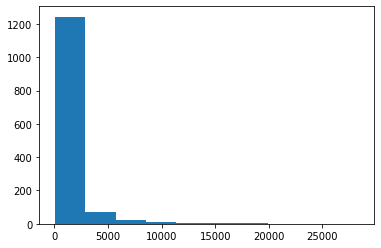

In [55]:
plt.hist(spam['length'])
plt.show()

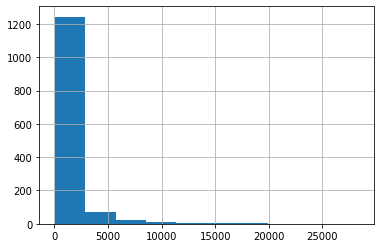

In [56]:
spam['length'].hist()
plt.show()

## 햄의 이메일 길이를 히스토그램으로 나타낸다.

- ==> 분석결과 길이와 스펨여부 관계는 의미가 없다. 문자열분석 해보자

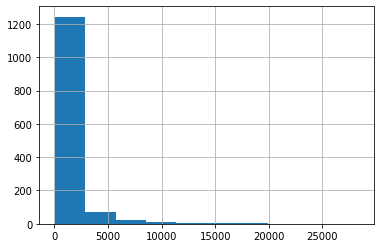

In [57]:
spam['length'].hist()
plt.show()

# STEP #3: CREATE TESTING AND TRAINING DATASET/DATA CLEANING

# STEP 3.1 쉼표, 마침표 등의 구두점 제거하기

In [58]:
import string

In [59]:
spam_df

,text,spam,length
0,Subject: naturally irresistible your corporate...,1,1484
1,Subject: the stock trading gunslinger fanny i...,1,598
2,Subject: unbelievable new homes made easy im ...,1,448
3,Subject: 4 color printing special request add...,1,500
4,"Subject: do not have money , get software cds ...",1,235
...,...,...,...
5723,Subject: re : research and development charges...,0,1189
5724,"Subject: re : receipts from visit jim , than...",0,1167
5725,Subject: re : enron case study update wow ! a...,0,2131
5726,"Subject: re : interest david , please , call...",0,1060


In [60]:
string.punctuation # 구두점 제거 함수 사용

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [61]:
test = ''Hello Mr Future !@#1~'

In [62]:
Test_punc_removed =[]

for char in test:
  if char not in string.punctuation :
    Test_punc_removed.append(char)

Test_punc_removed

['L',
 'e',
 'w',
 'j',
 'f',
 'i',
 'o',
 '2',
 '9',
 '0',
 '3',
 '5',
 '9',
 '1',
 '1',
 'd',
 'g',
 'j',
 'i',
 'a']

In [ ]:
Test_punc_removed =[ char for char in test: if char not in string.punctuation ] # list comprihension

In [64]:
Test_punc_removed_join = ''.join(Test_punc_removed)

Test_punc_removed_join

'Lewjfio29035911dgjia'

### 위의 문장에서, 글자를 앞에서부터 하나씩 가져와서, 구두점인지 확인한 후,
### 구두점이 아닌 문자만 리스트로 저장한다.

In [ ]:
# 결과 예시)   [ 'H', 'e', 'l', ...  'M', 'r', ' ','F' ... ]

In [ ]:

Test_punc_removed = 


### 위의 리스트에 있는 문자들을, 하나의 문자열로 만든다.
### 결과 예시) 'Hello Mr Future ...'

In [ ]:
Test_punc_removed_join =


# STEP 3.2 STOPWORDS(불용어) 제거하기
### Stopwords (불용어) 란? - https://bit.ly/34Ipha2

In [ ]:
# 불용어 사전은 만들어져 있다. 그거에 넣고 빼면서 쓰기. 중복제거가능한set 사용

In [112]:
import nltk  # natural language tool kit

In [66]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [67]:
from nltk.corpus import stopwords

In [70]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

### 구두점 제거한 문자열을, 이제 불용어 단어에 해당하지 않는 단어들만 모아서 리스트로 만든다.
### 결과 예시) ['Hello', 'Mr', 'Future' ... ]

In [71]:
Test_punc_removed_join_clean = []

for word in Test_punc_removed_join.split() :
  if word .lower() not in stopwords.words('english') :
    Test_punc_removed_join_clean.append(word) 

In [ ]:
Test_punc_removed_join_clean =[ word for word in Test_punc_removed_join.split() if word .lower() not in stopwords.words('english')]

# STEP 3.3 COUNT VECTORIZER 

In [72]:
from sklearn.feature_extraction.text import CountVectorizer

In [79]:
sample_data =['This is the first document.','I loved them', 'This document is the second document','I am loving you', 'And this is the third one']

In [80]:
vectorizer = CountVectorizer()

In [81]:
vectorizer.fit_transform(sample_data)

<5x14 sparse matrix of type '<class 'numpy.int64'>'
	with 21 stored elements in Compressed Sparse Row format>

In [82]:
# 모든 단어의 갯수가 15개

In [83]:
X = vectorizer.fit_transform(sample_data)

In [84]:
vectorizer.get_feature_names()

['am',
 'and',
 'document',
 'first',
 'is',
 'loved',
 'loving',
 'one',
 'second',
 'the',
 'them',
 'third',
 'this',
 'you']

In [85]:
X.toarray()

array([[0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 2, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0]])

In [86]:
sample_data

['This is the first document.',
 'I loved them',
 'This document is the second document',
 'I am loving you',
 'And this is the third one']

# 이제 데이터프레임에 있는 이메일 내용을 Cleanning 한다.

- 1 구두점 제거
- 2 stopword 제거 
- 3 count vec 적용

In [87]:
def message_cleaning (sentense) :
  Test_punc_removed = [ char for char in sentense if char not in string.punctuation ]
  Test_punc_removed_join = ''.join(Test_punc_removed)
  Test_punc_removed_join_clean = [ word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
  return Test_punc_removed_join_clean  # 문자열 리스트 리턴

In [ ]:
# test
message_cleaning ('hello world')

In [88]:
spam_df['text'].apply(message_cleaning)

0       [Subject, naturally, irresistible, corporate, ...
1       [Subject, stock, trading, gunslinger, fanny, m...
2       [Subject, unbelievable, new, homes, made, easy...
3       [Subject, 4, color, printing, special, request...
4       [Subject, money, get, software, cds, software,...
                              ...                        
5723    [Subject, research, development, charges, gpg,...
5724    [Subject, receipts, visit, jim, thanks, invita...
5725    [Subject, enron, case, study, update, wow, day...
5726    [Subject, interest, david, please, call, shirl...
5727    [Subject, news, aurora, 5, 2, update, aurora, ...
Name: text, Length: 5728, dtype: object

# 이메일의 내용을 벡터라이징 한다.

In [89]:
from sklearn.feature_extraction.text import CountVectorizer

In [91]:
vectorizer = CountVectorizer( analyzer= message_cleaning)  # 이 함수를 써서 data preprocessing 해라
X = vectorizer.fit_transform( spam_df['text'])

In [92]:
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [93]:
X.shape

(5728, 37229)

# STEP#4: TRAINING THE MODEL WITH ALL DATASET

In [94]:
from sklearn.naive_bayes import MultinomialNB  # 얘가 model

In [95]:
classifier = MultinomialNB()

In [97]:
X # sparse matrix
y = spam_df['spam']  # 정답

# STEP#4-2: Training셋과 Test셋으로 나눠서, 학습한다.
# 테스트셋은 20%로 한다. 

In [96]:
from sklearn.model_selection import train_test_split

In [99]:
train_test_split(X,y, test_size = 0.2, random_state = 7 ) # random의 시드

[<4582x37229 sparse matrix of type '<class 'numpy.int64'>'
 	with 451718 stored elements in Compressed Sparse Row format>,
 <1146x37229 sparse matrix of type '<class 'numpy.int64'>'
 	with 114190 stored elements in Compressed Sparse Row format>,
 4129    0
 431     1
 1699    0
 569     1
 1423    0
        ..
 5699    0
 2550    0
 537     1
 1220    1
 4271    0
 Name: spam, Length: 4582, dtype: int64,
 446     1
 1141    1
 2261    0
 2522    0
 2786    0
        ..
 180     1
 24      1
 5038    0
 2305    0
 3032    0
 Name: spam, Length: 1146, dtype: int64]

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 7 )

In [101]:
classifier.fit(X_train, y_train)  # 여기서 만들어서

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

# STEP#5: 테스트셋으로 평가한다. 분류의 문제이므로 컨퓨전 매트릭스 확인. 

In [102]:
from sklearn.metrics import confusion_matrix

In [103]:
y_pred = classifier.predict(X_test) # 얘가 api 서버에서 예측한다

In [ ]:
y_test.values # numpy array로 보기

In [104]:
confusion_matrix(y_test, y_pred) 

array([[869,   7],
       [  4, 266]])

In [ ]:
# 실제값하고 예측값 비교해는 함수
# 실제는 0인데 1이라고 에측한거가 7
# 실제는 1인데 0이라고 예측한거가 4 

In [ ]:
cm  =confusion_matrix(y_test, y_pred) 

In [ ]:
(869 + 266) / cm.sum()  # 정확도 계산

### 다음 2개의 문장을 테스트.


In [105]:
testing_sample = ['Free money!!!', "Hi Kim, Please let me know if you need any further information. Thanks"]

In [106]:
classifier.predict(testing_sample)
# 모양이 안맞음. 학습시킬때 모양 확인 X_train.shape (4562, 37229) 2차원인데 testing 은 1차원임
# 숫자로 바꿔줘야 함

ValueError: ignored

In [107]:
sample_X = vectorizer.transform(testing_sample) # 이미만들어놓은 벡터라이저 이용해서 변환해라

In [108]:
sample_X.shape

(2, 37229)

In [109]:
# np.array(testing_sample).reshape()
classifier.predict(sample_X)

array([1, 0])

In [ ]:
####### 2 #######
testing_sample = ['Hello, I am Ryan, I would like to book a hotel in Bali by January 24th', 'money viagara!!!!!']


In [110]:
sample_2 = vectorizer.transform(testing_sample)

In [111]:
classifier.predict(sample_2)

array([1, 0])